In [35]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

# dataset = pd.read_csv("/home/joelson/Dropbox/Kaggle/datasets/Tesla/tesla.csv")
# Dados da Tesla
dataset = pd.read_csv("/home/joelson/Dropbox/Kaggle/datasets/Tesla/tesla.csv")
dataset = dataset.apply(lambda x: x.str.replace(',','.'))
dataset = dataset.apply(lambda x: x.str.replace('M', ''))
dataset = dataset.apply(lambda x: x.str.replace('%', ''))
dataset = dataset.convert_objects(convert_numeric=True).dropna()
dataset['Vol.'] = dataset['Vol.'] * 10**6
############################################
classes = np.array(dataset['Último'])
date = dataset['Data']
dataset = dataset.drop(['Data', 'Var%', 'Último'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(dataset, classes, random_state=0)
model =  LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Score: ", model.score(X_test, y_pred))
print("MSE: ", (np.sum((y_pred - y_test)**2)) / len(y_pred))
print("Min difference: ", np.min((y_pred - y_test)**2))
print("Max difference: ", np.max((y_pred - y_test)**2))
print("Standard Deviation of the difference: ", np.std((y_pred - y_test)**2))

# teste 08/01/2019
                          # [[Abertura, maxima, minima, volume]]
result1 = model.predict([[320.0,  320.47, 308.01, 10827982]])
print("Preço de fechamento (Aprox.): ", result1)

# remoção para plotting abaixo...
dataset = dataset.drop(['Vol.'], axis=1)

/home/joelson/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


Score:  1.0
MSE:  6.462821853939923
Min difference:  1.671166575518808e-06
Max difference:  82.03877019077748
Standard Deviation of the difference:  11.709877982947978
Preço de fechamento (Aprox.):  [310.69514985]


In [36]:
display(dataset)

,Abertura,Máxima,Mínima
0,322.87,336.60,317.92
1,306.11,318.00,303.01
2,308.50,308.76,297.39
3,304.94,315.00,298.87
4,337.79,339.21,325.26
5,323.10,336.24,318.41
6,319.84,322.17,301.50
7,300.00,326.97,294.09
8,313.50,314.50,295.19
9,317.40,323.47,312.44


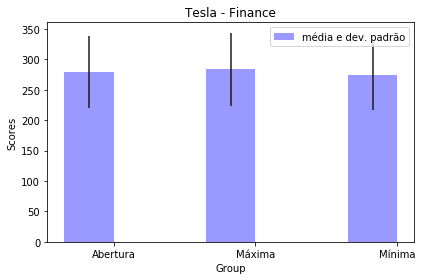

In [38]:
#plotting
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from collections import namedtuple

std = tuple(dataset.std(axis=0))
mean = tuple(dataset.mean(axis=0))
n_groups = 3

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.4
error_config = {'ecolor': '0.1'}

rects1 = ax.bar(index, mean, bar_width,
                alpha=opacity, color='b',
                yerr=std, error_kw=error_config, label='média e dev. padrão')
ax.set_xlabel('Group')
ax.set_ylabel('Scores')
ax.set_title('Tesla - Finance')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('Abertura', 'Máxima', 'Mínima'))
ax.legend()

fig.tight_layout()
plt.show()


Text(0.5,0.98,'Medição de preços (1 Ano)')

<Figure size 432x288 with 0 Axes>

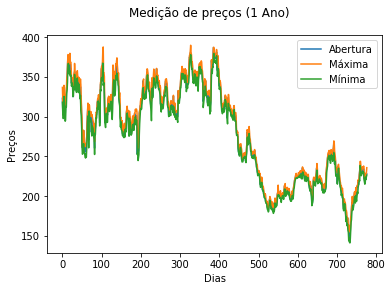

In [48]:
# série temporal de preços (por dia)
plt.figure(); dataset.plot()
plt.xlabel('Dias')
plt.ylabel('Preços')
plt.suptitle('Medição de preços (1 Ano)')

In [43]:
# correlação entre os atributos
dataset.corr().style.background_gradient().set_precision(3)

,Abertura,Máxima,Mínima
Abertura,1,0.997,0.997
Máxima,0.997,1,0.997
Mínima,0.997,0.997,1
